In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importación de librerías

In [3]:
# Librerías estándar
import os
import warnings

# Manipulación de datos
import pandas as pd
import numpy as np

# Configuración de warnings
warnings.filterwarnings('ignore')

# Análisis de nulos
import missingno as msno

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Textos
import unicodedata
#!pip install fuzzywuzzy
#from fuzzywuzzy import process
import re

In [4]:
#!pip install fuzzywuzzy

In [5]:
#from fuzzywuzzy import process

## Carga de datos



In [7]:
path = r'C:\Data Analytics_Nuclio\TFM\Fintech\Fintech\data\data'

In [8]:
file = 'bank-additional_bank-additional-full.csv'
ruta_fichero = os.path.join(path,file)

In [9]:
df = pd.read_csv(ruta_fichero, sep=';')

In [31]:
# Creación de la función para la exploración inicial de los datos
def exploracion_inicial(df, nombre=None):
    """
    Realiza una exploración inicial de un DataFrame y muestra información clave.

    Parámetros:
    df (pd.DataFrame): El DataFrame a explorar.

    Imprime:
    Información relevante sobre el DataFrame, incluyendo filas, columnas, tipos de datos,
    estadísticas descriptivas, y valores nulos.
    """
    if nombre:
      print(nombre.upper().center(40, ' '))
      print('\n\n')

    # Información básica sobre el DataFrame
    num_filas, num_columnas = df.shape
    print(f"¿Cuántas filas y columnas hay en el conjunto de datos?")
    print(f"\tHay {num_filas:,} filas y {num_columnas:,} columnas.")
    print('#' * 60)

    # Exploración completa
    print("¿Cuál es el tipo de datos de cada columna?")
    print(df.dtypes)
    print('-' * 100)

    print("¿Cuántas columnas hay de cada tipo de datos?")
    print(df.dtypes.value_counts())
    print('-' * 100)

    print("Información más completa sobre la estructura y el contenido del DataFrame")
    print(df.info())
    print('-' * 100)

    print("¿Cuántos valores únicos tiene cada columna?")
    print(df.nunique())
    print('-' * 100)

    print("¿Cuáles son los valores únicos de cada columna?")
    unique_summary = pd.DataFrame({
      "¿Cuántos valores únicos hay?": df.nunique(),
      "¿Cuáles son los valores únicos?": df.apply(lambda x: x.unique())})
    display(unique_summary)
    print('-' * 100)

    print("¿Cuáles son las 5 primeras filas?")
    display(df.head())
    print('-' * 100)

    print("¿Cuáles son las 5 últimas filas?")
    display(df.tail())
    print('-' * 100)

    print("¿Cuáles son las estadísticas descriptivas básicas de las columnas numéricas?")
    display(df.describe(include='number').fillna(''))
    print('-' * 100)

    print("¿Cuáles son las estadísticas descriptivas básicas de las columnas categóricas?")
    display(df.describe(include='object').fillna(''))
    print('-' * 100)

    print("¿Cuántos valores nulos hay en cada columna del DataFrame?")
    display(df.isnull().sum())
    print('-' * 100)

    print('#' * 90)

# Exploracion inicial de datos

In [32]:
exploracion_inicial(df, nombre= "Datos campañas digitales Fintech")

    DATOS CAMPAÑAS DIGITALES FINTECH    



¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 41,188 filas y 21 columnas.
############################################################
¿Cuál es el tipo de datos de cada columna?
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object
----------------------------------------------------------------------------------------------------
¿Cuántas columnas hay de cada tipo de datos?
object     11
int64       5
float64     5
Name: count, dty

,¿Cuántos valores únicos hay?,¿Cuáles son los valores únicos?
age,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5..."
job,12,"[housemaid, services, admin., blue-collar, tec..."
marital,4,"[married, single, divorced, unknown]"
education,8,"[basic.4y, high.school, basic.6y, basic.9y, pr..."
default,3,"[no, unknown, yes]"
housing,3,"[no, yes, unknown]"
loan,3,"[no, yes, unknown]"
contact,2,"[telephone, cellular]"
month,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ..."
day_of_week,5,"[mon, tue, wed, thu, fri]"


----------------------------------------------------------------------------------------------------
¿Cuáles son las 5 primeras filas?


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


----------------------------------------------------------------------------------------------------
¿Cuáles son las 5 últimas filas?


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


----------------------------------------------------------------------------------------------------
¿Cuáles son las estadísticas descriptivas básicas de las columnas numéricas?


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


----------------------------------------------------------------------------------------------------
¿Cuáles son las estadísticas descriptivas básicas de las columnas categóricas?


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


----------------------------------------------------------------------------------------------------
¿Cuántos valores nulos hay en cada columna del DataFrame?


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

----------------------------------------------------------------------------------------------------
##########################################################################################


In [ ]:
# ¿Cuántos valores "desconocidos" hay en porcentaje?
(df == "unknown").mean().mul(100).round(2)

age                0.00
job                0.80
marital            0.19
education          4.20
default           20.87
housing            2.40
loan               2.40
contact            0.00
month              0.00
day_of_week        0.00
duration           0.00
campaign           0.00
pdays              0.00
previous           0.00
poutcome           0.00
emp.var.rate       0.00
cons.price.idx     0.00
cons.conf.idx      0.00
euribor3m          0.00
nr.employed        0.00
y                  0.00
dtype: float64

In [38]:
# ¿Cuál es el porcentaje de clientes que contrataron un depósito?
df['y'].value_counts(normalize=True).mul(100).round(2)

y
no     88.73
yes    11.27
Name: proportion, dtype: float64

In [39]:
# ¿Cuántas filas hay duplicadas?
df.duplicated().sum()

np.int64(12)

In [40]:
# Mostramos qué filas son las duplicadas
df[df.duplicated(keep=False)]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


# Analisis de datos

## Análisis de variables del cliente

### 1.1 Edad ("age") vs contratación ("y")

In [44]:
# Distribución de la variable "age"
df.groupby("y")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36548.0,39.911185,9.898132,17.0,32.0,38.0,47.0,95.0
yes,4640.0,40.913147,13.837476,17.0,31.0,37.0,50.0,98.0


In [45]:
# Conversión por grupos
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ["<25", "25-35", "35-45", "45-55", "55-65", "65+"]

df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels)

df.groupby("age_group")["y"].value_counts(normalize=True).mul(100).round(2)


age_group  y  
<25        no     79.05
           yes    20.95
25-35      no     88.28
           yes    11.72
35-45      no     91.49
           yes     8.51
45-55      no     91.31
           yes     8.69
55-65      no     84.78
           yes    15.22
65+        no     53.15
           yes    46.85
Name: proportion, dtype: float64

In [46]:
# Tamaño muestral por grupos
df["age_group"].value_counts()


age_group
25-35    14847
35-45    12844
45-55     8249
55-65     2963
<25       1666
65+        619
Name: count, dtype: int64

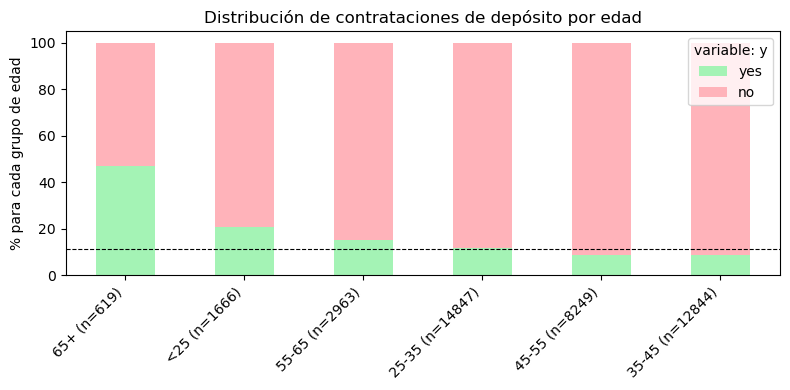

In [221]:
# Creación de gráfico visual

# Tamaño muestral
n_por_age_group = df["age_group"].value_counts()

# Tabla de porcentajes yes/no por job
tabla_age_group_plot = (
    df.groupby("age_group")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .unstack()
)

# Ordenar por % yes (de mayor a menor)
tabla_age_group_plot = tabla_age_group_plot.sort_values(by="yes", ascending=False)

# Cambiar etiquetas para incluir el número de la muestra
tabla_age_group_plot.index = [f"{age_group} (n={n_por_age_group[age_group]})" for age_group in tabla_age_group_plot.index]

# Plot apilado
tabla_age_group_plot[["yes", "no"]].plot(kind="bar", stacked=True, figsize=(8, 4), color=["#a4f3b5", "#ffb3ba"])

plt.ylabel("% para cada grupo de edad")
plt.title("Distribución de contrataciones de depósito por edad")
plt.xticks(rotation=45, ha="right")
plt.legend(title="variable: y")

# Calcular el porcentaje total de conversión "yes"
conversion_global = df["y"].value_counts(normalize=True)["yes"] *100

# Añadir una línea horizontal con el porcentaje total de conversión "yes"
plt.axhline(conversion_global,color="black", linestyle="--", linewidth=0.8)

plt.tight_layout()
plt.show()

### 1.2 Ocupación ("job") vs contratación ("y")

In [88]:
# Distribución de la variable "job" y tamaño muestral de los grupos
df["job"].value_counts().to_frame(name="cantidad")

,cantidad
job,
admin.,10422
blue-collar,9254
technician,6743
services,3969
management,2924
retired,1720
entrepreneur,1456
self-employed,1421
housemaid,1060


In [90]:
# Conversión por grupos
df.groupby("job")["y"].value_counts(normalize=True).mul(100).round(2).to_frame(name="porcentaje")

porcentaje
job           y              
admin.        no        87.03
              yes       12.97
blue-collar   no        93.11
              yes        6.89
entrepreneur  no        91.48
              yes        8.52
housemaid     no        90.00
              yes       10.00
management    no        88.78
              yes       11.22
retired       no        74.77
              yes       25.23
self-employed no        89.51
              yes       10.49
services      no        91.86
              yes        8.14
student       no        68.57
              yes       31.43
technician    no        89.17
              yes       10.83
unemployed    no        85.80
              yes       14.20
unknown       no        88.79
              yes       11.21

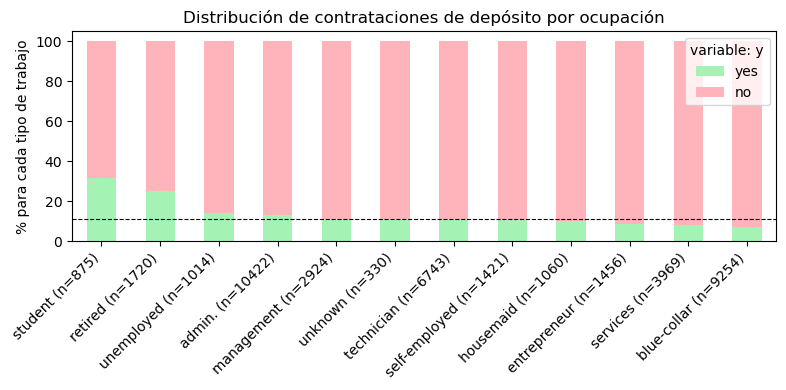

In [89]:
# Creación de gráfico visual

# Tamaño muestral
n_por_job = df["job"].value_counts()

# Tabla de porcentajes yes/no por job
tabla_job_plot = (
    df.groupby("job")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .unstack()
)

# Ordenar por % yes (de mayor a menor)
tabla_job_plot = tabla_job_plot.sort_values(by="yes", ascending=False)

# Cambiar etiquetas para incluir el número de la muestra
tabla_job_plot.index = [f"{job} (n={n_por_job[job]})" for job in tabla_job_plot.index]

# Plot apilado
tabla_job_plot[["yes", "no"]].plot(kind="bar", stacked=True, figsize=(8, 4), color=["#a4f3b5", "#ffb3ba"])

plt.ylabel("% para cada tipo de trabajo")
plt.title("Distribución de contrataciones de depósito por ocupación")
plt.xticks(rotation=45, ha="right")
plt.legend(title="variable: y")

# Calcular el porcentaje total de conversión "yes"
conversion_global = df["y"].value_counts(normalize=True)["yes"] *100

# Añadir una línea horizontal con el porcentaje total de conversión "yes"
plt.axhline(conversion_global,color="black", linestyle="--", linewidth=0.8)

plt.tight_layout()
plt.show()

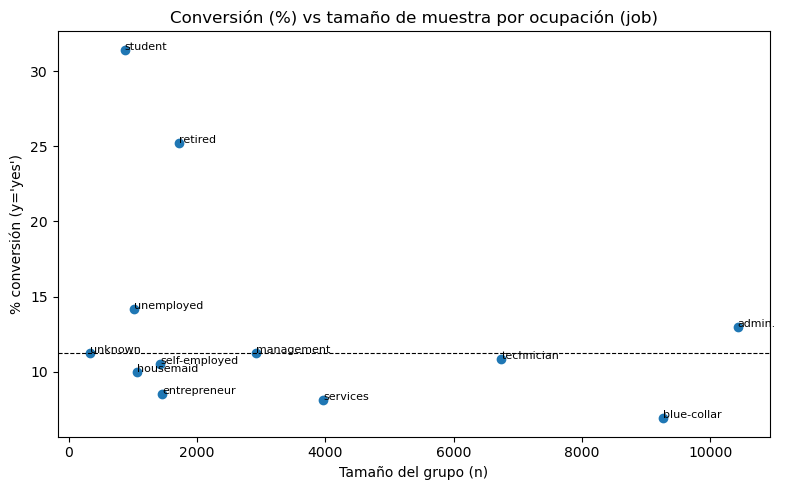

In [107]:
# 1) Calcular tamaño (n) y conversión (%) por job
scatter_job = df.groupby("job").agg(
    n=("y", "count"),
    conversion_pct=("y", lambda x: (x == "yes").mean() * 100)
).reset_index()

# 2) Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(scatter_job["n"], scatter_job["conversion_pct"])

plt.xlabel("Tamaño del grupo (n)")
plt.ylabel("% conversión (y='yes')")
plt.title("Conversión (%) vs tamaño de muestra por ocupación (job)")

# 3) Línea de conversión global
conversion_global = df["y"].value_counts(normalize=True)["yes"] * 100
plt.axhline(conversion_global, color="black", linestyle="--", linewidth=0.8)

# 4) Añadir etiquetas con el nombre del job
for i, row in scatter_job.iterrows():
    plt.text(row["n"], row["conversion_pct"], row["job"], fontsize=8)

plt.tight_layout()
plt.show()


### 1.3 Estado civil ("marital") cv contratación ("y")

In [87]:
# Distribución de la variable "marital" y tamaño muestral
df["marital"].value_counts().to_frame(name="cantidad")

,cantidad
marital,
married,24928
single,11568
divorced,4612
unknown,80


In [99]:
# Conversión por grupos en valor absoluto
tabla_marital_absoluto = df.groupby("marital")["y"].value_counts().unstack()
tabla_marital_absoluto.sort_values(by="yes", ascending=False, inplace=True)
tabla_marital_absoluto["total"] = tabla_marital_absoluto["no"] + tabla_marital_absoluto["yes"]
tabla_marital_absoluto

y,no,yes,total
marital,,,
married,22396,2532,24928
single,9948,1620,11568
divorced,4136,476,4612
unknown,68,12,80


In [92]:
# Conversión por grupos en porcentaje
df.groupby("marital")["y"].value_counts(normalize=True).mul(100).round(2).to_frame(name="porcentaje")

porcentaje
marital  y              
divorced no        89.68
         yes       10.32
married  no        89.84
         yes       10.16
single   no        86.00
         yes       14.00
unknown  no        85.00
         yes       15.00

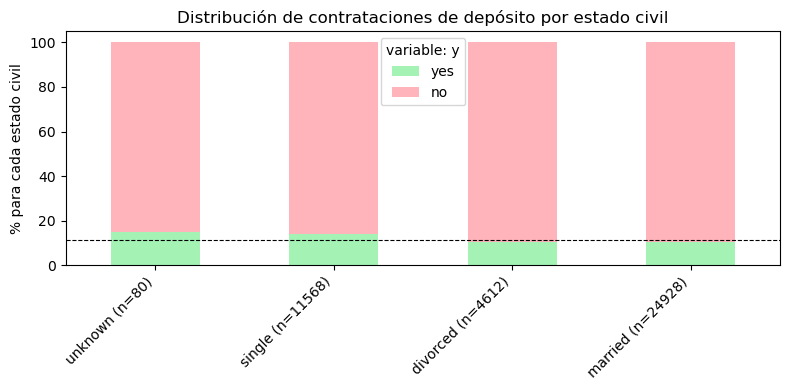

In [102]:
# Creación de gráfico visual

# Tamaño muestral
n_por_marital = df["marital"].value_counts()

# Tabla de porcentajes yes/no por grupos de estado civil
tabla_marital_plot = (
    df.groupby("marital")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .unstack()
)

# Ordenar por % yes (de mayor a menor)
tabla_marital_plot = tabla_marital_plot.sort_values(by="yes", ascending=False)

# Cambiar etiquetas para incluir el número de la muestra
tabla_marital_plot.index = [f"{m} (n={n_por_marital[m]})" for m in tabla_marital_plot.index]

# Plot apilado
tabla_marital_plot[["yes", "no"]].plot(kind="bar", stacked=True, figsize=(8, 4), color=["#a4f3b5", "#ffb3ba"])

plt.ylabel("% para cada estado civil")
plt.title("Distribución de contrataciones de depósito por estado civil")
plt.xticks(rotation=45, ha="right")
plt.legend(title="variable: y")

# Calcular el porcentaje total de conversión "yes"
conversion_global = df["y"].value_counts(normalize=True)["yes"] *100

# Añadir una línea horizontal con el porcentaje total de conversión "yes"
plt.axhline(conversion_global,color="black", linestyle="--", linewidth=0.8)

plt.tight_layout()
plt.show()

### 1.4 Nivel educativo ("education") vs contratación ("y")

In [103]:
# Distribución de la variable "education" y tamaño muestral
df["education"].value_counts().to_frame(name="cantidad")

,cantidad
education,
university.degree,12168
high.school,9515
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2292
unknown,1731
illiterate,18


In [104]:
# Conversión por grupos en valor absoluto
tabla_education_absoluto = df.groupby("education")["y"].value_counts().unstack()
tabla_education_absoluto.sort_values(by="yes", ascending=False, inplace=True)
tabla_education_absoluto["total"] = tabla_education_absoluto["no"] + tabla_education_absoluto["yes"]
tabla_education_absoluto

y,no,yes,total
education,,,
university.degree,10498,1670,12168
high.school,8484,1031,9515
professional.course,4648,595,5243
basic.9y,5572,473,6045
basic.4y,3748,428,4176
unknown,1480,251,1731
basic.6y,2104,188,2292
illiterate,14,4,18


In [105]:
# Conversión por grupos en porcentaje
df.groupby("education")["y"].value_counts(normalize=True).mul(100).round(2).to_frame(name="porcentaje")

porcentaje
education           y              
basic.4y            no        89.75
                    yes       10.25
basic.6y            no        91.80
                    yes        8.20
basic.9y            no        92.18
                    yes        7.82
high.school         no        89.16
                    yes       10.84
illiterate          no        77.78
                    yes       22.22
professional.course no        88.65
                    yes       11.35
university.degree   no        86.28
                    yes       13.72
unknown             no        85.50
                    yes       14.50

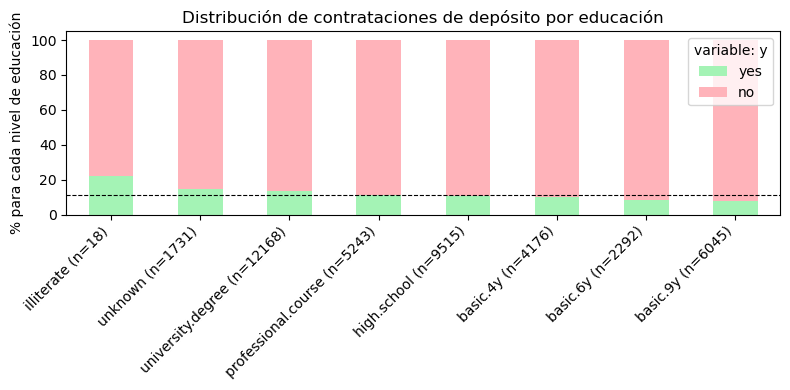

In [ ]:
# Creación de gráfico visual

# Tamaño muestral
n_por_education = df["education"].value_counts()

# Tabla de porcentajes yes/no por grupos de educación
tabla_education_plot = (
    df.groupby("education")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .unstack()
)

# Ordenar por % yes (de mayor a menor)
tabla_education_plot = tabla_education_plot.sort_values(by="yes", ascending=False)

# Cambiar etiquetas para incluir el número de la muestra
tabla_education_plot.index = [f"{e} (n={n_por_education[e]})" for e in tabla_education_plot.index]

# Plot apilado
tabla_education_plot[["yes", "no"]].plot(kind="bar", stacked=True, figsize=(8, 4), color=["#a4f3b5", "#ffb3ba"])

plt.ylabel("% para cada nivel de educación")
plt.title("Distribución de contrataciones de depósito por educación")
plt.xticks(rotation=45, ha="right")
plt.legend(title="variable: y")

# Calcular el porcentaje total de conversión "yes"
conversion_global = df["y"].value_counts(normalize=True)["yes"] *100

# Añadir una línea horizontal con el porcentaje total de conversión "yes"
plt.axhline(conversion_global,color="black", linestyle="--", linewidth=0.8)

plt.tight_layout()
plt.show()


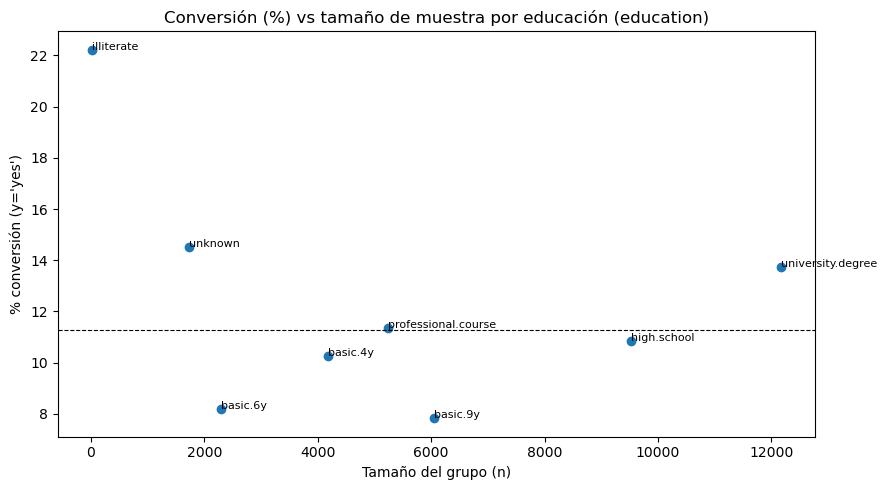

In [108]:
scatter_edu = df.groupby("education").agg(
    n=("y", "count"),
    conversion_pct=("y", lambda x: (x == "yes").mean() * 100)
).reset_index()

plt.figure(figsize=(9, 5))
plt.scatter(scatter_edu["n"], scatter_edu["conversion_pct"])

plt.xlabel("Tamaño del grupo (n)")
plt.ylabel("% conversión (y='yes')")
plt.title("Conversión (%) vs tamaño de muestra por educación (education)")

conversion_global = df["y"].value_counts(normalize=True)["yes"] * 100
plt.axhline(conversion_global, color="black", linestyle="--", linewidth=0.8)

for i, row in scatter_edu.iterrows():
    plt.text(row["n"], row["conversion_pct"], row["education"], fontsize=8)

plt.tight_layout()
plt.show()


### 1.5 Default vs contratación ("y")

In [109]:
# Distribución de la variable "default" y tamaño muestral
df["default"].value_counts().to_frame(name="cantidad")

,cantidad
default,
no,32588
unknown,8597
yes,3


In [111]:
# Conversión por grupos en valores absolutos
df.groupby("default")["y"].value_counts().to_frame(name="porcentaje")

porcentaje
default y              
no      no        28391
        yes        4197
unknown no         8154
        yes         443
yes     no            3

In [110]:
# Conversión por grupos en porcentaje
df.groupby("default")["y"].value_counts(normalize=True).mul(100).round(2).to_frame(name="porcentaje")

porcentaje
default y              
no      no        87.12
        yes       12.88
unknown no        94.85
        yes        5.15
yes     no       100.00

### 1.6 Hipoteca ("housing") vs contratación ("y")

In [112]:
# Distribución de la variable "housing" y su tamaño muestral
df["housing"].value_counts().to_frame(name="cantidad")

,cantidad
housing,
yes,21576
no,18622
unknown,990


In [113]:
# Conversión por grupos en valor absoluto
tabla_housing_absoluto = df.groupby("housing")["y"].value_counts().unstack()
tabla_housing_absoluto.sort_values(by="yes", ascending=False, inplace=True)
tabla_housing_absoluto["total"] = tabla_housing_absoluto["no"] + tabla_housing_absoluto["yes"]
tabla_housing_absoluto

y,no,yes,total
housing,,,
yes,19069,2507,21576
no,16596,2026,18622
unknown,883,107,990


In [114]:
# Conversión por grupos en porcentaje
df.groupby("housing")["y"].value_counts(normalize=True).mul(100).round(2).to_frame(name="porcentaje")

porcentaje
housing y              
no      no        89.12
        yes       10.88
unknown no        89.19
        yes       10.81
yes     no        88.38
        yes       11.62

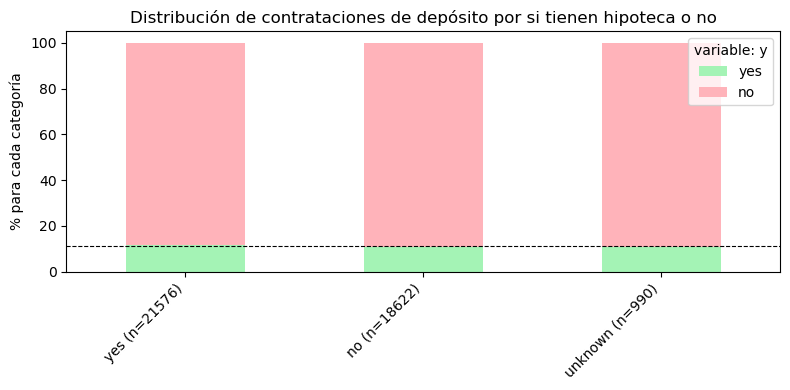

In [ ]:
# Creación de gráfico visual

# Tamaño muestral
n_por_housing = df["housing"].value_counts()

# Tabla de porcentajes yes/no por si tienen hipoteca o no
tabla_housing_plot = (
    df.groupby("housing")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .unstack()
)

# Ordenar por % yes (de mayor a menor)
tabla_housing_plot = tabla_housing_plot.sort_values(by="yes", ascending=False)

# Cambiar etiquetas para incluir el número de la muestra
tabla_housing_plot.index = [f"{h} (n={n_por_housing[h]})" for h in tabla_housing_plot.index]

# Plot apilado
tabla_housing_plot[["yes", "no"]].plot(kind="bar", stacked=True, figsize=(8, 4), color=["#a4f3b5", "#ffb3ba"])

plt.ylabel("% para cada categoría")
plt.title("Distribución de contrataciones de depósito por si tienen hipoteca o no")
plt.xticks(rotation=45, ha="right")
plt.legend(title="variable: y")

# Calcular el porcentaje total de conversión "yes"
conversion_global = df["y"].value_counts(normalize=True)["yes"] *100

# Añadir una línea horizontal con el porcentaje total de conversión "yes"
plt.axhline(conversion_global,color="black", linestyle="--", linewidth=0.8)

plt.tight_layout()
plt.show()

### 1.7 Préstamo personal ("loan") vs contratación ("y")

In [116]:
# Distribución de la variable "loan" y su tamaño muestral
df["loan"].value_counts().to_frame(name="cantidad")

,cantidad
loan,
no,33950
yes,6248
unknown,990


In [117]:
# Conversión por grupos en valor absoluto
tabla_loan_absoluto = df.groupby("loan")["y"].value_counts().unstack()
tabla_loan_absoluto.sort_values(by="yes", ascending=False, inplace=True)
tabla_loan_absoluto["total"] = tabla_loan_absoluto["no"] + tabla_loan_absoluto["yes"]
tabla_loan_absoluto

y,no,yes,total
loan,,,
no,30100,3850,33950
yes,5565,683,6248
unknown,883,107,990


In [118]:
# Conversión por grupos en porcentaje
df.groupby("loan")["y"].value_counts(normalize=True).mul(100).round(2).to_frame(name="porcentaje")

porcentaje
loan    y              
no      no        88.66
        yes       11.34
unknown no        89.19
        yes       10.81
yes     no        89.07
        yes       10.93

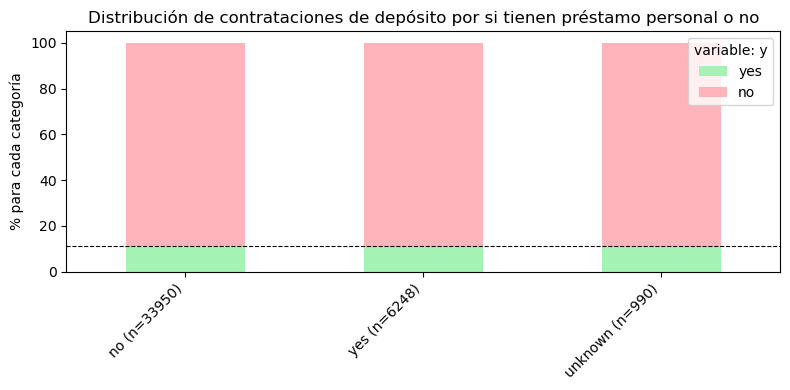

In [ ]:
# Creación de gráfico visual

# Tamaño muestral
n_por_loan = df["loan"].value_counts()

# Tabla de porcentajes yes/no por si tienen préstamo personal o no
tabla_loan_plot = (
    df.groupby("loan")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .unstack()
)

# Ordenar por % yes (de mayor a menor)
tabla_loan_plot = tabla_loan_plot.sort_values(by="yes", ascending=False)

# Cambiar etiquetas para incluir el número de la muestra
tabla_loan_plot.index = [f"{l} (n={n_por_loan[l]})" for l in tabla_loan_plot.index]

# Plot apilado
tabla_loan_plot[["yes", "no"]].plot(kind="bar", stacked=True, figsize=(8, 4), color=["#a4f3b5", "#ffb3ba"])

plt.ylabel("% para cada categoría")
plt.title("Distribución de contrataciones de depósito por si tienen préstamo personal o no")
plt.xticks(rotation=45, ha="right")
plt.legend(title="variable: y")

# Calcular el porcentaje total de conversión "yes"
conversion_global = df["y"].value_counts(normalize=True)["yes"] *100

# Añadir una línea horizontal con el porcentaje total de conversión "yes"
plt.axhline(conversion_global,color="black", linestyle="--", linewidth=0.8)

plt.tight_layout()
plt.show()

## Análisis de variables de las campañas

### 2.1 Contact vs contratación ("y")

In [120]:
# Distribución de la variable "contact" y su tamaño muestral
df['contact'].value_counts().to_frame(name="cantidad")

,cantidad
contact,
cellular,26144
telephone,15044


In [121]:
# Conversión por grupos en valor absoluto
tabla_contact_absoluto = df.groupby("contact")["y"].value_counts().unstack()
tabla_contact_absoluto.sort_values(by="yes", ascending=False, inplace=True)
tabla_contact_absoluto["total"] = tabla_contact_absoluto["no"] + tabla_contact_absoluto["yes"]
tabla_contact_absoluto

y,no,yes,total
contact,,,
cellular,22291,3853,26144
telephone,14257,787,15044


In [122]:
# Conversión por grupos en porcentaje
df.groupby("contact")["y"].value_counts(normalize=True).mul(100).round(2).to_frame(name="porcentaje")

porcentaje
contact   y              
cellular  no        85.26
          yes       14.74
telephone no        94.77
          yes        5.23

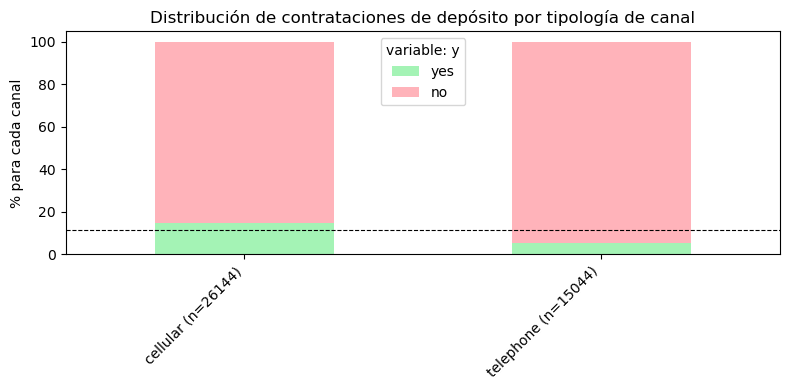

In [ ]:
# Creación de gráfico visual

# Tamaño muestral
n_por_contact = df["contact"].value_counts()

# Tabla de porcentajes yes/no por tipología de contacto
tabla_contact_plot = (
    df.groupby("contact")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .unstack()
)

# Ordenar por % yes (de mayor a menor)
tabla_contact_plot = tabla_contact_plot.sort_values(by="yes", ascending=False)

# Cambiar etiquetas para incluir el número de la muestra
tabla_contact_plot.index = [f"{c} (n={n_por_contact[c]})" for c in tabla_contact_plot.index]

# Plot apilado
tabla_contact_plot[["yes", "no"]].plot(kind="bar", stacked=True, figsize=(8, 4), color=["#a4f3b5", "#ffb3ba"])

plt.ylabel("% para cada canal")
plt.title("Distribución de contrataciones de depósito por tipología de canal")
plt.xticks(rotation=45, ha="right")
plt.legend(title="variable: y")

# Calcular el porcentaje total de conversión "yes"
conversion_global = df["y"].value_counts(normalize=True)["yes"] *100

# Añadir una línea horizontal con el porcentaje total de conversión "yes"
plt.axhline(conversion_global,color="black", linestyle="--", linewidth=0.8)

plt.tight_layout()
plt.show()

### 2.2 Mes ("month") vs contratación ("y")

In [125]:
# Orden de meses para poder visualizarlos mejor en un gráfico
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

In [126]:
# Convertimos la columna "month" en categórica ordenada
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

In [128]:
# Distribución de la variable "month" y su tamaño muestral
df['month'].value_counts().to_frame(name="cantidad").sort_index()

,cantidad
month,
mar,546
apr,2632
may,13769
jun,5318
jul,7174
aug,6178
sep,570
oct,718
nov,4101


In [130]:
# Conversión por grupos en valor absoluto
tabla_month_absoluto = df.groupby("month")["y"].value_counts().unstack()
tabla_month_absoluto["total"] = tabla_month_absoluto["no"] + tabla_month_absoluto["yes"]
tabla_month_absoluto

y,no,yes,total
month,,,
mar,270,276,546
apr,2093,539,2632
may,12883,886,13769
jun,4759,559,5318
jul,6525,649,7174
aug,5523,655,6178
sep,314,256,570
oct,403,315,718
nov,3685,416,4101


In [131]:
# Conversión por grupos en porcentaje
df.groupby("month")["y"].value_counts(normalize=True).mul(100).round(2).to_frame(name="porcentaje")

porcentaje
month y              
mar   yes       50.55
      no        49.45
apr   no        79.52
      yes       20.48
may   no        93.57
      yes        6.43
jun   no        89.49
      yes       10.51
jul   no        90.95
      yes        9.05
aug   no        89.40
      yes       10.60
sep   no        55.09
      yes       44.91
oct   no        56.13
      yes       43.87
nov   no        89.86
      yes       10.14
dec   no        51.10
      yes       48.90

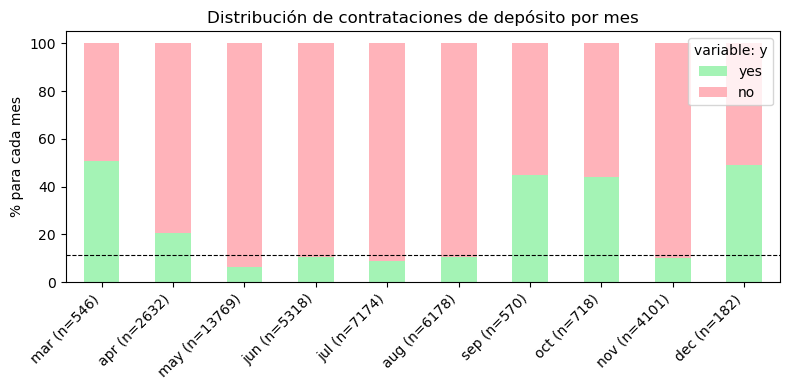

In [ ]:
# Creación de gráfico visual

# Tamaño muestral
n_por_month = df["month"].value_counts()

# Tabla de porcentajes yes/no por mes
tabla_month_plot = (
    df.groupby("month")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .unstack()
)

# Cambiar etiquetas para incluir el número de la muestra
tabla_month_plot.index = [f"{m} (n={n_por_month[m]})" for m in tabla_month_plot.index]

# Plot apilado
tabla_month_plot[["yes", "no"]].plot(kind="bar", stacked=True, figsize=(8, 4), color=["#a4f3b5", "#ffb3ba"])

plt.ylabel("% para cada mes")
plt.title("Distribución de contrataciones de depósito por mes")
plt.xticks(rotation=45, ha="right")
plt.legend(title="variable: y")

# Calcular el porcentaje total de conversión "yes"
conversion_global = df["y"].value_counts(normalize=True)["yes"] *100

# Añadir una línea horizontal con el porcentaje total de conversión "yes"
plt.axhline(conversion_global,color="black", linestyle="--", linewidth=0.8)

plt.tight_layout()
plt.show()

### 2.3 Día de la semana ("day_of_week") vs contratación ("y")

In [135]:
# Orden de días de la semana para poder visualizarlos mejor en un gráfico
days_of_week_order = ['mon', 'tue', 'wed', 'thu', 'fri']

In [136]:
# Convertimos la columna "day_of_week" en categórica ordenada
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days_of_week_order, ordered=True)

In [138]:
# Distribución de la variable "day_of_week" y su tamaño muestral
df['day_of_week'].value_counts().to_frame(name="cantidad").sort_index()

,cantidad
day_of_week,
mon,8514
tue,8090
wed,8134
thu,8623
fri,7827


In [139]:
# Conversión por grupos en valor absoluto
tabla_day_of_week_absoluto = df.groupby("day_of_week")["y"].value_counts().unstack()
tabla_day_of_week_absoluto["total"] = tabla_day_of_week_absoluto["no"] + tabla_day_of_week_absoluto["yes"]
tabla_day_of_week_absoluto

y,no,yes,total
day_of_week,,,
mon,7667,847,8514
tue,7137,953,8090
wed,7185,949,8134
thu,7578,1045,8623
fri,6981,846,7827


In [140]:
# Conversión por grupos en porcentaje
df.groupby("day_of_week")["y"].value_counts(normalize=True).mul(100).round(2).to_frame(name="porcentaje")

porcentaje
day_of_week y              
mon         no        90.05
            yes        9.95
tue         no        88.22
            yes       11.78
wed         no        88.33
            yes       11.67
thu         no        87.88
            yes       12.12
fri         no        89.19
            yes       10.81

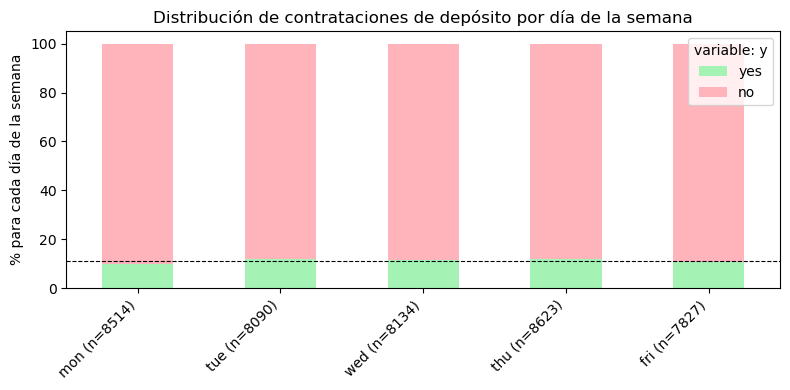

In [ ]:
# Creación de gráfico visual

# Tamaño muestral
n_por_day_of_week = df["day_of_week"].value_counts()

# Tabla de porcentajes yes/no por grupos de días de la semana
tabla_day_of_week_plot = (
    df.groupby("day_of_week")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .unstack()
)

# Cambiar etiquetas para incluir el número de la muestra
tabla_day_of_week_plot.index = [f"{d} (n={n_por_day_of_week[d]})" for d in tabla_day_of_week_plot.index]

# Plot apilado
tabla_day_of_week_plot[["yes", "no"]].plot(kind="bar", stacked=True, figsize=(8, 4), color=["#a4f3b5", "#ffb3ba"])

plt.ylabel("% para cada día de la semana")
plt.title("Distribución de contrataciones de depósito por día de la semana")
plt.xticks(rotation=45, ha="right")
plt.legend(title="variable: y")

# Calcular el porcentaje total de conversión "yes"
conversion_global = df["y"].value_counts(normalize=True)["yes"] *100

# Añadir una línea horizontal con el porcentaje total de conversión "yes"
plt.axhline(conversion_global,color="black", linestyle="--", linewidth=0.8)

plt.tight_layout()
plt.show()

### 2.4 Duración ("duration") vs contratación ("y")

In [144]:
# Distribución de la variable "duration"
df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [145]:
df.groupby('y')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36548.0,220.844807,207.096293,0.0,95.0,163.5,279.00,4918.0
yes,4640.0,553.191164,401.171871,37.0,253.0,449.0,741.25,4199.0


In [ ]:
# Creación de una nueva columna pasándola a binaria
df["y_bin"] = df["y"].map({"no": 0, "yes": 1})

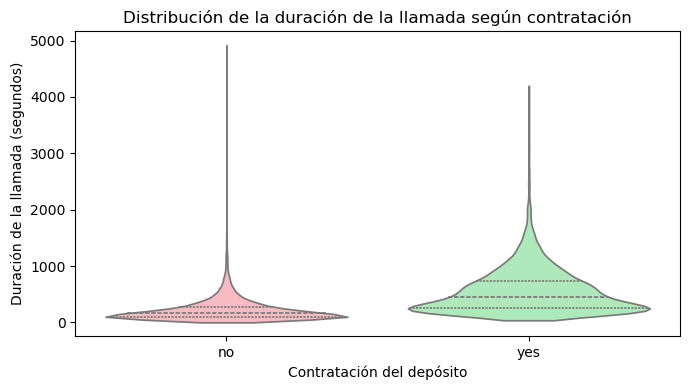

In [147]:
plt.figure(figsize=(7,4))

sns.violinplot(
    data=df,
    x='y',
    y='duration',
    inner='quartile',
    cut=0,
    palette={'no': '#ffb3ba', 'yes': '#a4f3b5'}
)

plt.title('Distribución de la duración de la llamada según contratación')
plt.xlabel('Contratación del depósito')
plt.ylabel('Duración de la llamada (segundos)')

plt.tight_layout()
plt.show()

### 2.5 Número de contactos realizados al cliente durante la campaña actual ("campaign") vs contratación ("y")

In [148]:
# Distribución de la variable "campaign"
df['campaign'].describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [154]:
# Nos quedamos con los que tengan menos de 6 contactos para afinar el filtro y tener una visión más clara
df_campaign_filt = df[df['campaign'] <= 6]

In [155]:
tabla_campaign_pct = (
    df_campaign_filt
    .groupby('campaign')['y']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .unstack()
)

tabla_campaign_pct

y,no,yes
campaign,,
1,86.96,13.04
2,88.54,11.46
3,89.25,10.75
4,90.61,9.39
5,92.50,7.50
6,92.34,7.66


In [168]:
# ¿Cuántos clientes fueron contactados más de 6 veces?
(df['campaign'] > 6).mean() * 100

np.float64(5.8415072351170245)

In [171]:
# Conversión por grupos en porcentaje
df[df["campaign"] <= 6] \
  .groupby("campaign")["y"] \
  .value_counts(normalize=True) \
  .mul(100) \
  .round(2) \
  .to_frame(name="porcentaje")


porcentaje
campaign y              
1        no        86.96
         yes       13.04
2        no        88.54
         yes       11.46
3        no        89.25
         yes       10.75
4        no        90.61
         yes        9.39
5        no        92.50
         yes        7.50
6        no        92.34
         yes        7.66

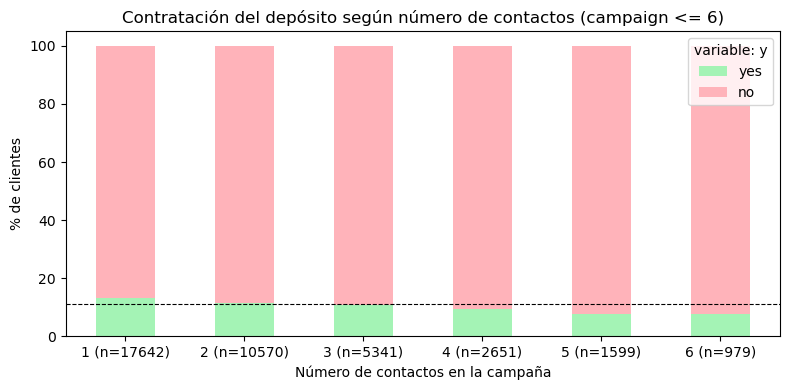

In [ ]:
# Creación de gráfico visual

# Tamaño muestral
n_por_campaign = df["campaign"].value_counts()

# Tabla de porcentajes yes/no por grupos de número de contactos
tabla_campaign_plot = (
    df[df["campaign"] <= 6]
    .groupby("campaign")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .unstack()
)

# Cambiar etiquetas para incluir el número de la muestra
tabla_campaign_plot.index = [f"{c} (n={n_por_campaign[c]})" for c in tabla_campaign_plot.index]

# Plot apilado
tabla_campaign_plot[["yes", "no"]].plot(kind="bar", stacked=True, figsize=(8, 4), color=["#a4f3b5", "#ffb3ba"])

plt.xlabel("Número de contactos en la campaña")
plt.ylabel("% de clientes")
plt.title("Contratación del depósito según número de contactos (campaign <= 6)")
plt.xticks(rotation=0)
plt.legend(title="variable: y")

# Calcular el porcentaje total de conversión "yes"
conversion_global = df["y"].value_counts(normalize=True)["yes"] *100

# Añadir una línea horizontal con el porcentaje total de conversión "yes"
plt.axhline(conversion_global,color="black", linestyle="--", linewidth=0.8)

plt.tight_layout()
plt.show()

### 2.6 Análisis de la campaña anterior

#### 2.6.1 Contactos realizados previos a la campaña actual ("previous") vs contratación ("y")

In [181]:
# Datos estadísticos de la variable "previous"
df['previous'].describe()

count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [ ]:
# Distribución de la variable "previous" y su tamaño muestral
df['previous'].value_counts().sort_index().to_frame(name='cantidad')


,cantidad
previous,
0,35563
1,4561
2,754
3,216
4,70
5,18
6,5
7,1


In [207]:
# Conversión por grupos en porcentaje
df.groupby('previous')['y'].value_counts(normalize=True).mul(100).round(2).to_frame(name='porcentaje')


porcentaje
previous y              
0        no        91.17
         yes        8.83
1        no        78.80
         yes       21.20
2        no        53.58
         yes       46.42
3        yes       59.26
         no        40.74
4        yes       54.29
         no        45.71
5        yes       72.22
         no        27.78
6        yes       60.00
         no        40.00
7        no       100.00

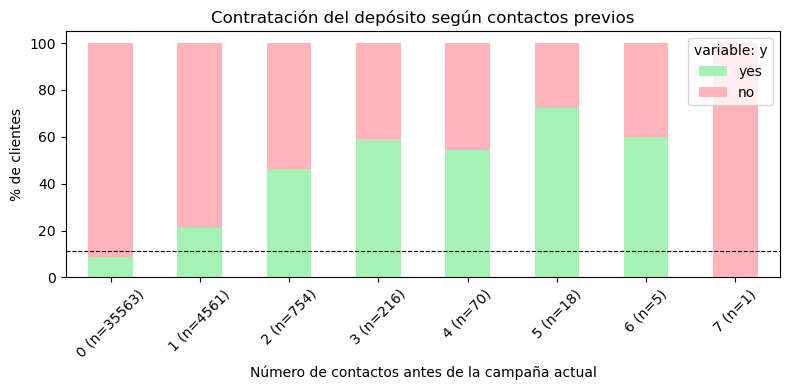

In [191]:
# Creación de gráfico visual

# Tamaño muestral
n_por_previous = df["previous"].value_counts()

# Tabla de porcentajes yes/no por grupos de número de contactos antes de la campaña actual
tabla_previous_plot = (df.groupby("previous")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .unstack()
)

# Cambiar etiquetas para incluir el número de la muestra
tabla_previous_plot.index = [f"{p} (n={n_por_previous[p]})" for p in tabla_previous_plot.index]

# Plot apilado
tabla_previous_plot[["yes", "no"]].plot(kind="bar", stacked=True, figsize=(8, 4), color=["#a4f3b5", "#ffb3ba"])

plt.xlabel("Número de contactos antes de la campaña actual")
plt.ylabel("% de clientes")
plt.title("Contratación del depósito según contactos previos")
plt.xticks(rotation=45)
plt.legend(title="variable: y")

# Calcular el porcentaje total de conversión "yes"
conversion_global = df["y"].value_counts(normalize=True)["yes"] *100

# Añadir una línea horizontal con el porcentaje total de conversión "yes"
plt.axhline(conversion_global,color="black", linestyle="--", linewidth=0.8)

plt.tight_layout()
plt.show()

#### 2.6.2 Días transcurridos desde que el cliente fue contactado en la anterior campaña ("pdays") vs contratación ("y")

In [192]:
# Distribución de la variable "pdays"
df['pdays'].describe()

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [193]:
# Distribución de la variable "pdays" y su tamaño muestral
df['pdays'].value_counts().sort_index().to_frame(name='cantidad')

,cantidad
pdays,
0,15
1,26
2,61
3,439
4,118
5,46
6,412
7,60
8,18


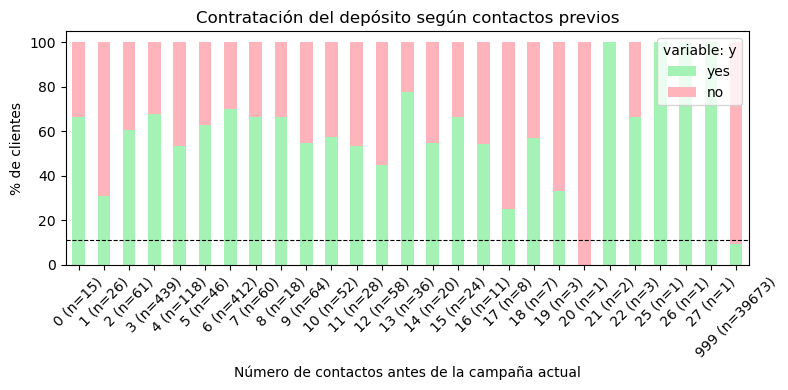

In [227]:
# Creación de gráfico visual

# Tamaño muestral
n_por_pdays = df["pdays"].value_counts()

# Tabla de porcentajes yes/no por grupos de número de contactos antes de la campaña actual
tabla_pdays_plot = (df.groupby("pdays")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .unstack()
)

# Cambiar etiquetas para incluir el número de la muestra
tabla_pdays_plot.index = [f"{p} (n={n_por_pdays[p]})" for p in tabla_pdays_plot.index]

# Plot apilado
tabla_pdays_plot[["yes", "no"]].plot(kind="bar", stacked=True, figsize=(8, 4), color=["#a4f3b5", "#ffb3ba"])

plt.xlabel("Número de contactos antes de la campaña actual")
plt.ylabel("% de clientes")
plt.title("Contratación del depósito según contactos previos")
plt.xticks(rotation=45)
plt.legend(title="variable: y")

# Calcular el porcentaje total de conversión "yes"
conversion_global = df["y"].value_counts(normalize=True)["yes"] *100

# Añadir una línea horizontal con el porcentaje total de conversión "yes"
plt.axhline(conversion_global,color="black", linestyle="--", linewidth=0.8)

plt.tight_layout()
plt.show()

In [206]:
# Conversión por grupos en porcentaje
df.groupby(df['pdays'] == 999)['y'].value_counts(normalize=True).mul(100).round(2)


pdays  y  
False  yes    63.83
       no     36.17
True   no     90.74
       yes     9.26
Name: proportion, dtype: float64

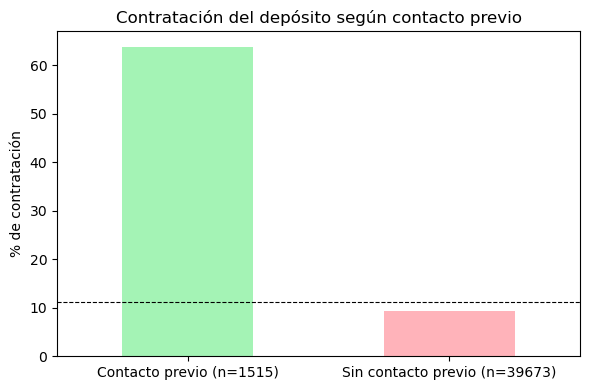

<Figure size 640x480 with 0 Axes>

In [198]:
tabla_pdays_pct = (
    df.groupby(df['pdays'] == 999)['y']
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack()
)

tabla_pdays_pct.index = ['Contacto previo', 'Sin contacto previo']


n_pdays = df.groupby(df['pdays'] == 999).size()
n_pdays.index = ['Contacto previo', 'Sin contacto previo']

# Conversión media global
conversion_global = df['y'].value_counts(normalize=True)['yes'] * 100

# Gráfico de barras
ax = tabla_pdays_pct['yes'].plot(
    kind='bar',
    figsize=(6,4),
    color=['#a4f3b5', '#ffb3ba']
)

# Línea de conversión media
plt.axhline(
    conversion_global,
    color='black',
    linestyle='--',
    linewidth=0.8
)

# Etiquetas con tamaño muestral
ax.set_xticklabels(
    [f'{label} (n={n_pdays[label]})' for label in tabla_pdays_pct.index],
    rotation=0
)

plt.ylabel('% de contratación')
plt.title('Contratación del depósito según contacto previo')
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#### 2.6.3 Resultado de la campaña anterior ("poutcome") vs contratación ("y")

In [201]:
# Distribucion de la variable "poutcome" y su tamaño muestral
df['poutcome'].value_counts().to_frame(name="cantidad")

,cantidad
poutcome,
nonexistent,35563
failure,4252
success,1373


In [205]:
# Conversión por grupos en porcentaje
df.groupby('poutcome')['y'].value_counts(normalize=True).mul(100).round(2).to_frame(name='porcentaje')


porcentaje
poutcome    y              
failure     no        85.77
            yes       14.23
nonexistent no        91.17
            yes        8.83
success     yes       65.11
            no        34.89

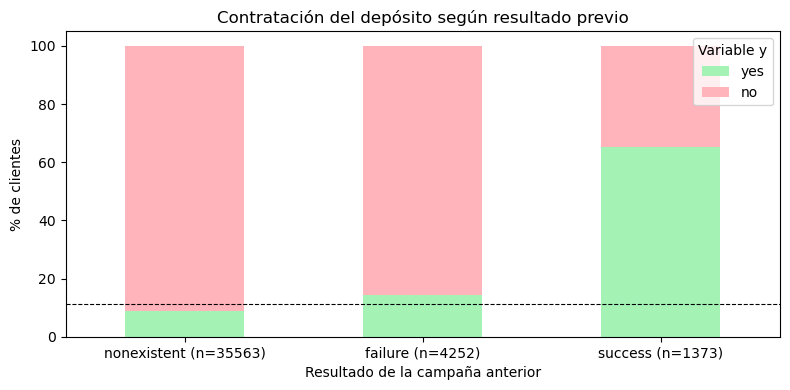

In [210]:
# Creación del gráfico

# Preparacion tabla
tabla_poutcome_plot = (
    df.groupby('poutcome')['y']
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack()
)

tabla_poutcome_plot = tabla_poutcome_plot.sort_index()

# Tamaño muestral para cada categoría
n_poutcome = df['poutcome'].value_counts()

tabla_poutcome_plot = tabla_poutcome_plot.loc[n_poutcome.index] 

ax = tabla_poutcome_plot[['yes', 'no']].plot(
    kind='bar',
    stacked=True,
    figsize=(8,4),
    color=['#a4f3b5', '#ffb3ba']
)

# Media global
conversion_global = df['y'].value_counts(normalize=True)['yes'] * 100
plt.axhline(conversion_global, color='black', linestyle='--', linewidth=0.8)

# Etiquetas con n
ax.set_xticklabels(
    [f"{cat} (n={n_poutcome[cat]})" for cat in tabla_poutcome_plot.index],
    rotation=0
)

plt.ylabel('% de clientes')
plt.xlabel('Resultado de la campaña anterior')
plt.title('Contratación del depósito según resultado previo')
plt.legend(title='Variable y')
plt.tight_layout()
plt.show()

In [214]:
macro_cols = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

df_macro = df[macro_cols + ["y", "month"]].copy()

In [215]:
df_macro[macro_cols].describe()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,1.570960,0.578840,4.628198,1.734447,72.251528
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [216]:
df_macro[macro_cols].nunique().sort_values()

emp.var.rate       10
nr.employed        11
cons.conf.idx      26
cons.price.idx     26
euribor3m         316
dtype: int64

In [217]:
df_macro.groupby("month")[macro_cols].mean()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
month,,,,,
mar,-1.800000,93.097330,-42.650549,1.162745,5055.390110
apr,-1.800000,93.119558,-46.273632,1.361070,5093.123708
may,-0.164972,93.528882,-40.579272,3.293665,5149.521592
jun,0.688379,94.245402,-41.579428,4.256908,5197.493193
jul,1.158921,93.894923,-42.370170,4.685678,5214.078575
aug,0.747151,93.311065,-35.597184,4.300623,5200.248349
sep,-2.177368,93.346474,-33.893158,0.834760,4988.847895
oct,-2.438579,93.175107,-34.580919,1.200123,5018.823816
nov,-0.418483,93.200943,-41.238747,3.723123,5173.031236


In [ ]:
# El Euribor tiene una correlación muy positiva con la tasa de empleo; 
# a mayor tasa de empleo el tipo de interés del Euribor sube
# A mayor tasa de empleo, el IPC también sube
corr = df_macro[macro_cols].corr(method="pearson")
corr

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
emp.var.rate,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,0.906970,0.522034,0.100513,0.945154,1.000000


## Analizar columnas

In [ ]:
dict_analizar_columnas = {}

for k, v in diccionario_datos.items():
  print(k.upper())
  print('#' * 90)
  df_aux = analizar_columnas(v)
  df_aux['Fuente'] = k

  df_aux.reset_index(inplace = True)
  df_aux.rename(columns={'index': 'Columna'}, inplace = True)

  order_columns = ['Fuente', 'Columna', 'Tipo', 'Num_nulos', 'Pct_nulos', 'Valores']
  df_aux = df_aux[order_columns]

  dict_analizar_columnas[k] = df_aux
  print('#' * 90)
  # crear una variable 'Fuente' cuyo valor sea la k y almancenar el dataframe resultante en dict_analizar_columnas

BANK-ADDITIONAL_BANK-ADDITIONAL-FULL
##########################################################################################


,Tipo,Num_nulos,Pct_nulos,Valores
age,int64,0,0.0,"[74, 21, 68, 38, 70]"
job,object,0,0.0,"[unemployed, blue-collar, retired, services, t..."
marital,object,0,0.0,"[single, married, divorced, unknown]"
education,object,0,0.0,"[unknown, basic.9y, illiterate, university.deg..."
default,object,0,0.0,"[unknown, yes, no]"
housing,object,0,0.0,"[no, yes, unknown]"
loan,object,0,0.0,"[no, unknown, yes]"
contact,object,0,0.0,"[cellular, telephone]"
month,object,0,0.0,"[oct, mar, dec, apr, jul]"
day_of_week,object,0,0.0,"[wed, fri, mon, thu, tue]"


##########################################################################################
